# Import the necessary libraries

This will display the names of all tables available in the IMDB database.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect('im.db')
query = "SELECT name FROM sqlite_master WHERE type='table';"
imdb_tables = pd.read_sql(query, conn)
imdb_tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


Query Data

In [3]:
# Query data from the movie_ratings table
query_movies = "SELECT * FROM movie_ratings;"  # Example: Selecting the first 5 rows
movie_ratings = pd.read_sql(query_movies, conn)

# Display the queried data
print(movie_ratings)

         movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]


In [4]:
# 1. Check for missing values
missing_values = movie_ratings.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 movie_id         0
averagerating    0
numvotes         0
dtype: int64


Perform Exploratory Analysis

In [5]:
print(movie_ratings.columns)

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')


In [6]:
# 2. Summary statistics
print("\nSummary Statistics:\n", movie_ratings.describe(include='all'))


Summary Statistics:
          movie_id  averagerating      numvotes
count       73856   73856.000000  7.385600e+04
unique      73856            NaN           NaN
top     tt3466866            NaN           NaN
freq            1            NaN           NaN
mean          NaN       6.332729  3.523662e+03
std           NaN       1.474978  3.029402e+04
min           NaN       1.000000  5.000000e+00
25%           NaN       5.500000  1.400000e+01
50%           NaN       6.500000  4.900000e+01
75%           NaN       7.400000  2.820000e+02
max           NaN      10.000000  1.841066e+06


       averagerating      numvotes
count   73856.000000  7.385600e+04
mean        6.332729  3.523662e+03
std         1.474978  3.029402e+04
min         1.000000  5.000000e+00
25%         5.500000  1.400000e+01
50%         6.500000  4.900000e+01
75%         7.400000  2.820000e+02
max        10.000000  1.841066e+06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None
movie_id         0
averagerating    0
numvotes         0
dtype: int64


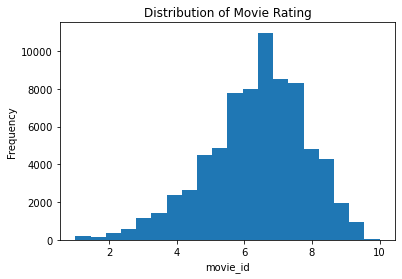

In [7]:
# Get summary statistics of the DataFrame
print(movie_ratings.describe())

# Check data types of columns
print(movie_ratings.info())

# Check for missing values
print(movie_ratings.isnull().sum())

# Visualize distributions, correlations, etc.
import matplotlib.pyplot as plt
plt.hist(movie_ratings['averagerating'], bins=20)
plt.xlabel('movie_id')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Rating')
plt.show()

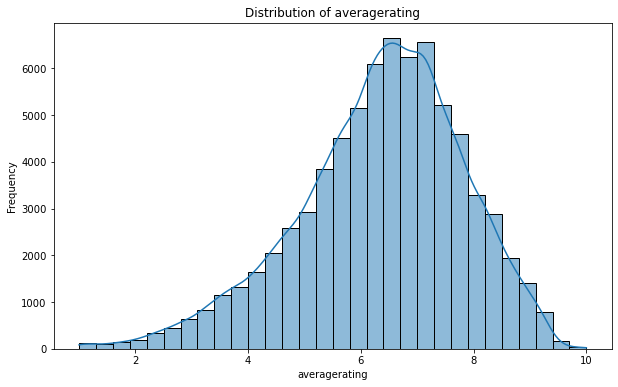

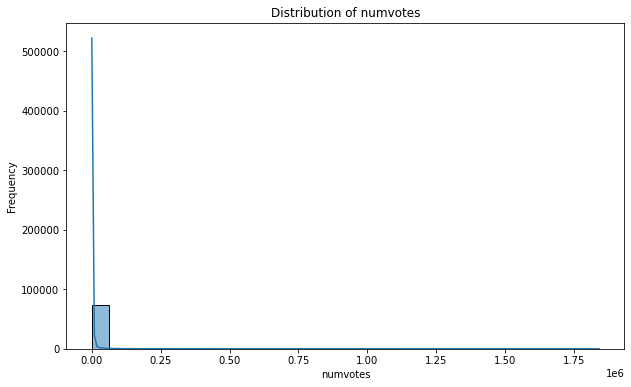

In [8]:
# 3. Distribution of numerical columns
numerical_columns = movie_ratings.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(movie_ratings[column].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

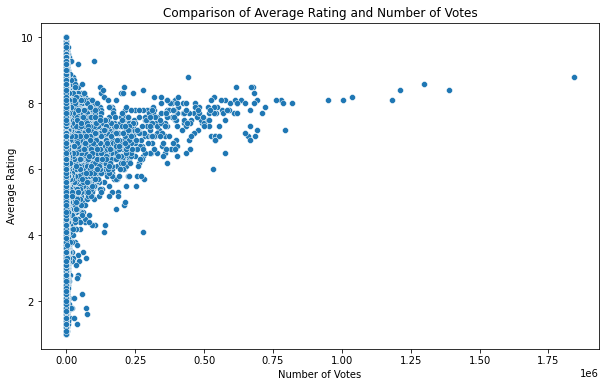

In [9]:
# 5. Scatter plot for averagerating and numvotes
#if 'averagerating' in movies_data.columns and 'numvotes' in movies_data.columns:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movie_ratings, x='numvotes', y='averagerating')
plt.title('Comparison of Average Rating and Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.show()
#else:

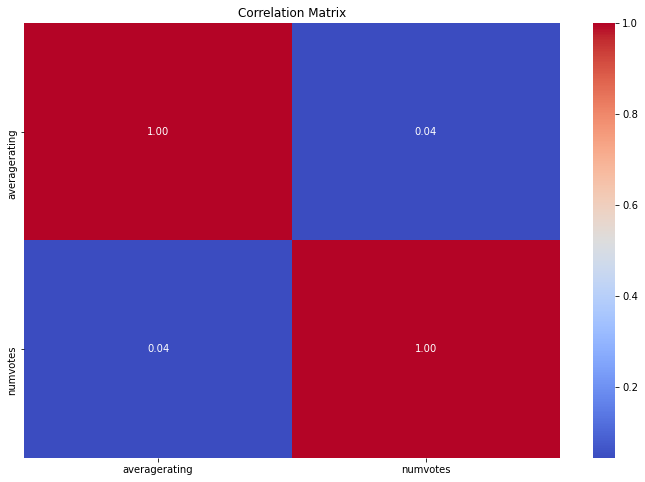

In [10]:
# 4. Correlation matrix
corr = movie_ratings.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Understanding the structure of the data in the tables

In [11]:
# Query data from the movie_ratings table
query_movies = "SELECT * FROM movie_basics limit 5;"  # Example: Selecting the first 5 rows
movie_basics = pd.read_sql(query_movies, conn)

# Display the queried data
print(movie_basics)

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


In [12]:
# Query data from the movie_ratings table
query_movies = "SELECT * FROM directors limit 5;"  # Example: Selecting the first 5 rows
directors = pd.read_sql(query_movies, conn)

# Display the queried data
print(directors)

    movie_id  person_id
0  tt0285252  nm0899854
1  tt0462036  nm1940585
2  tt0835418  nm0151540
3  tt0835418  nm0151540
4  tt0878654  nm0089502


In [13]:
# Query data from the movie_ratings table
query_movies = "SELECT * FROM known_for limit 5;"  
known_for = pd.read_sql(query_movies, conn)

# Display the queried data
print(known_for)

   person_id   movie_id
0  nm0061671  tt0837562
1  nm0061671  tt2398241
2  nm0061671  tt0844471
3  nm0061671  tt0118553
4  nm0061865  tt0896534


In [14]:
# Query data from the movie_ratings table
query_movies = "SELECT * FROM movie_akas limit 5;"  
movie_akas = pd.read_sql(query_movies, conn)

# Display the queried data
print(movie_akas)

    movie_id  ordering                                    title region  \
0  tt0369610        10                            Джурасик свят     BG   
1  tt0369610        11                        Jurashikku warudo     JP   
2  tt0369610        12  Jurassic World: O Mundo dos Dinossauros     BR   
3  tt0369610        13                  O Mundo dos Dinossauros     BR   
4  tt0369610        14                           Jurassic World     FR   

  language        types   attributes  is_original_title  
0       bg         None         None                0.0  
1     None  imdbDisplay         None                0.0  
2     None  imdbDisplay         None                0.0  
3     None         None  short title                0.0  
4     None  imdbDisplay         None                0.0  


In [15]:
# Query data from the movie_ratings table
query_movies = "SELECT * FROM persons limit 5;"  
persons = pd.read_sql(query_movies, conn)

# Display the queried data
print(persons)

   person_id       primary_name birth_year death_year  \
0  nm0061671  Mary Ellen Bauder       None       None   
1  nm0061865       Joseph Bauer       None       None   
2  nm0062070         Bruce Baum       None       None   
3  nm0062195       Axel Baumann       None       None   
4  nm0062798        Pete Baxter       None       None   

                                 primary_profession  
0         miscellaneous,production_manager,producer  
1        composer,music_department,sound_department  
2                        miscellaneous,actor,writer  
3  camera_department,cinematographer,art_department  
4  production_designer,art_department,set_decorator  


In [16]:
# Query data from the movie_ratings table
query_movies = "SELECT * FROM principals limit 5;"  
principals = pd.read_sql(query_movies, conn)

# Display the queried data
print(principals)

    movie_id  ordering  person_id  category       job        characters
0  tt0111414         1  nm0246005     actor      None       ["The Man"]
1  tt0111414         2  nm0398271  director      None              None
2  tt0111414         3  nm3739909  producer  producer              None
3  tt0323808        10  nm0059247    editor      None              None
4  tt0323808         1  nm3579312   actress      None  ["Beth Boothby"]


In [17]:
# Query data from the movie_ratings table
query_movies = "SELECT * FROM writers limit 5;"  
writers = pd.read_sql(query_movies, conn)

# Display the queried data
print(writers)

    movie_id  person_id
0  tt0285252  nm0899854
1  tt0438973  nm0175726
2  tt0438973  nm1802864
3  tt0462036  nm1940585
4  tt0835418  nm0310087


In [18]:
# Merge the tables on movie_id
merged_df = movie_basics
merged_df = merged_df.merge(directors, on='movie_id', how='left')
merged_df = merged_df.merge(movie_akas, on='movie_id', how='left')
merged_df = merged_df.merge(movie_ratings, on='movie_id', how='left')
merged_df = merged_df.merge(principals, on='movie_id', how='left')
merged_df = merged_df.merge(writers, on='movie_id', how='left')

# Display the first few rows of the merged DataFrame
print(merged_df.head())

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres person_id_x  ordering_x  \
0        2013            175.0    Action,Crime,Drama         NaN         NaN   
1        2019            114.0       Biography,Drama         NaN         NaN   
2        2018            122.0                 Drama         NaN         NaN   
3        2018              NaN          Comedy,Drama         NaN         NaN   
4        2017             80.0  Comedy,Drama,Fantasy         NaN         NaN   

  title region  ... attributes is_original_title average

In [19]:
# Display basic information about the merged DataFrame
print(merged_df.info())

# Check for missing values
print(merged_df.isnull().sum())

# Summary statistics
print(merged_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           5 non-null      object 
 1   primary_title      5 non-null      object 
 2   original_title     5 non-null      object 
 3   start_year         5 non-null      int64  
 4   runtime_minutes    4 non-null      float64
 5   genres             5 non-null      object 
 6   person_id_x        0 non-null      object 
 7   ordering_x         0 non-null      float64
 8   title              0 non-null      object 
 9   region             0 non-null      object 
 10  language           0 non-null      object 
 11  types              0 non-null      object 
 12  attributes         0 non-null      object 
 13  is_original_title  0 non-null      float64
 14  averagerating      5 non-null      float64
 15  numvotes           5 non-null      int64  
 16  ordering_y         0 non-null 

Visualizations

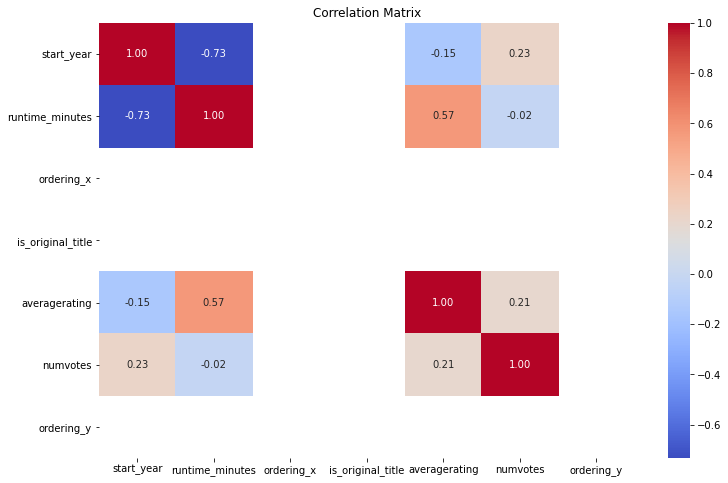

In [20]:
# Correlation heatmap
corr = merged_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

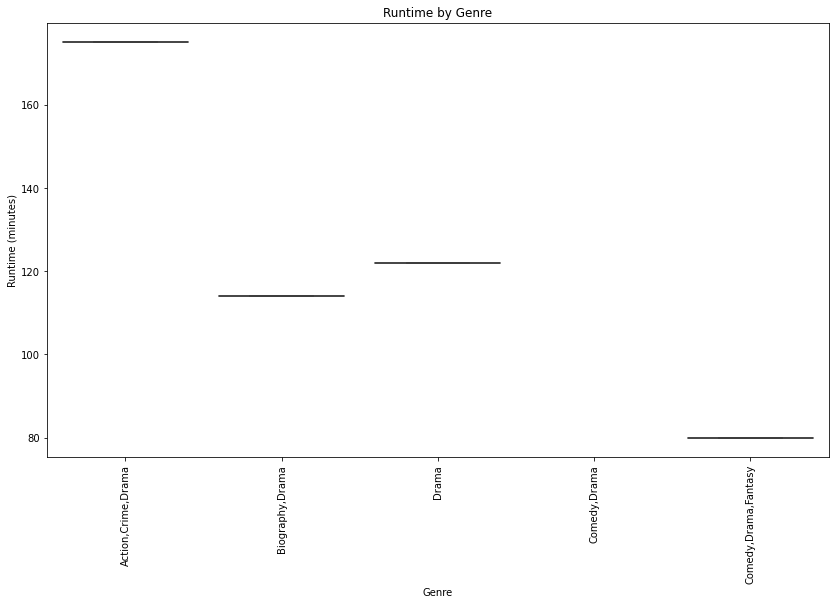

In [21]:
# Boxplot of runtime by genre
plt.figure(figsize=(14, 8))
sns.boxplot(x='genres', y='runtime_minutes', data=merged_df)
plt.title('Runtime by Genre')
plt.xlabel('Genre')
plt.ylabel('Runtime (minutes)')
plt.xticks(rotation=90)
plt.show()